# Supervised ML - Simple Linear Regression - Waist Circumference & Adipose Tissue Data 

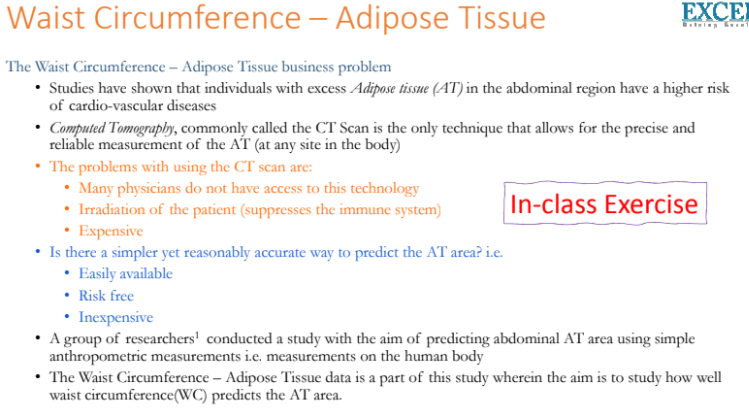

In [1]:
# import Libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [4]:
# import dataset
dataset=pd.read_csv('Database/wc-at.csv')
dataset

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


## EDA and data visualization

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


C:\Users\Hitesh Koli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


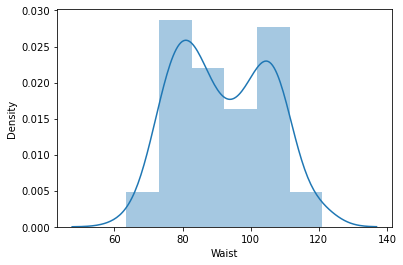

In [6]:
sns.distplot(dataset['Waist'])

C:\Users\Hitesh Koli\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


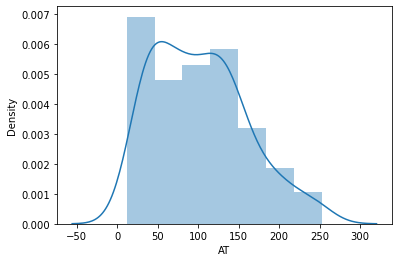

In [7]:
sns.distplot(dataset['AT'])

## Correlation Analysis

In [8]:
dataset.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


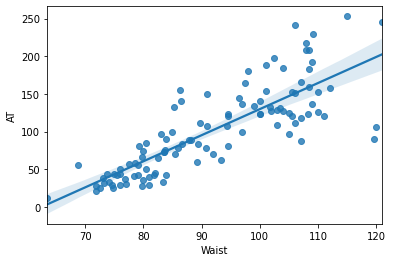

In [9]:
sns.regplot(x=dataset['Waist'],y=dataset['AT'])

## Model Building

In [10]:
model=smf.ols("AT~Waist",data=dataset).fit()

## Model Testing

In [11]:
# Finding coefficient parameters
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [15]:
# Finindinf tvalues and pvalues
model.tvalues, model.pvalues

(Intercept    -9.909103
 Waist        14.740376
 dtype: float64,
 Intercept    8.197416e-17
 Waist        1.618607e-27
 dtype: float64)

In [16]:
# Finding Rsquared values
model.rsquared, model.rsquared_adj

(0.6700368930528429, 0.6669531256981966)

In [17]:
# Determination Coefficient = rsquared value = 0.6700 ; good fit = 67%

## Model Prediction

In [31]:
# Manual predicition
AT=-215.981488+(3.458859)*(70) # Say, Waist=70
AT

26.138641999999976

In [25]:
# Automatic prediction
new_data=pd.Series([70,80])
new_data

0    70
1    80
dtype: int64

In [29]:
data_pred=pd.DataFrame(new_data,columns=['Waist'])
data_pred

,Waist
0,70
1,80


In [30]:
model.predict(data_pred)

0    26.138669
1    60.727263
dtype: float64